<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_1_0_9_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n250.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.761461,43.059468,74.570711,-0.123206,212.268434,213.024983,-0.756548
1,0.0,1.0,46.267770,64.239552,92.011060,0.185887,212.704268,212.692339,0.011929
2,0.0,2.0,45.487029,36.587971,69.467111,0.287832,161.829944,161.928968,-0.099024
3,0.0,3.0,55.378400,52.628519,85.096530,-0.443339,202.660109,203.449170,-0.789061
4,0.0,4.0,32.094749,66.445037,81.993856,-0.205076,190.328567,190.533143,-0.204576
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.341580,94.630057,64.581972,-0.851797,191.701812,192.183018,-0.481206
19996,999.0,16.0,66.740858,81.305563,28.257783,-0.614900,185.689304,186.041161,-0.351857
19997,999.0,17.0,55.802181,43.081328,94.710684,-0.475727,203.118467,204.082329,-0.963863
19998,999.0,18.0,59.220068,22.460641,91.403046,0.036241,183.119995,183.771265,-0.651270


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.761461,43.059468,74.570711,-0.123206,212.268434,213.024983,-0.756548
1,0.0,1.0,46.267770,64.239552,92.011060,0.185887,212.704268,212.692339,0.011929
2,0.0,2.0,45.487029,36.587971,69.467111,0.287832,161.829944,161.928968,-0.099024
3,0.0,3.0,55.378400,52.628519,85.096530,-0.443339,202.660109,203.449170,-0.789061
4,0.0,4.0,32.094749,66.445037,81.993856,-0.205076,190.328567,190.533143,-0.204576
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.341580,94.630057,64.581972,-0.851797,191.701812,192.183018,-0.481206
19996,999.0,16.0,66.740858,81.305563,28.257783,-0.614900,185.689304,186.041161,-0.351857
19997,999.0,17.0,55.802181,43.081328,94.710684,-0.475727,203.118467,204.082329,-0.963863
19998,999.0,18.0,59.220068,22.460641,91.403046,0.036241,183.119995,183.771265,-0.651270


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.761461  43.059468  74.570711  ...  212.268434  213.024983 -0.756548
      1.0    46.267770  64.239552  92.011060  ...  212.704268  212.692339  0.011929
      2.0    45.487029  36.587971  69.467111  ...  161.829944  161.928968 -0.099024
      3.0    55.378400  52.628519  85.096530  ...  202.660109  203.449170 -0.789061
      4.0    32.094749  66.445037  81.993856  ...  190.328567  190.533143 -0.204576
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   23.341580  94.630057  64.581972  ...  191.701812  192.183018 -0.481206
      16.0   66.740858  81.305563  28.257783  ...  185.689304  186.041161 -0.351857
      17.0   55.802181  43.081328  94.710684  ...  203.118467  204.082329 -0.963863
      18.0   59.220068  22.460641  91.403046  ...  183.119995  183.771265 -0.651270
      19.0   67.437219  21.336332  57.976726  ...  158.328374  157.274441  1.053933

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.761461  43.059468  74.570711  ...  212.268434  213.024983 -0.756548
      1.0    46.267770  64.239552  92.011060  ...  212.704268  212.692339  0.011929
      2.0    45.487029  36.587971  69.467111  ...  161.829944  161.928968 -0.099024
      3.0    55.378400  52.628519  85.096530  ...  202.660109  203.449170 -0.789061
      4.0    32.094749  66.445037  81.993856  ...  190.328567  190.533143 -0.204576
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   23.341580  94.630057  64.581972  ...  191.701812  192.183018 -0.481206
      16.0   66.740858  81.305563  28.257783  ...  185.689304  186.041161 -0.351857
      17.0   55.802181  43.081328  94.710684  ...  203.118467  204.082329 -0.963863
      18.0   59.220068  22.460641  91.403046  ...  183.119995  183.771265 -0.651270
      19.0   67.437219  21.336332  57.976726  ...  158.328374  157.274441  1.053933

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.761461,43.059468,74.570711,-0.123206,212.268434,213.024983,-0.756548
1,0.0,1.0,46.267770,64.239552,92.011060,0.185887,212.704268,212.692339,0.011929
2,0.0,2.0,45.487029,36.587971,69.467111,0.287832,161.829944,161.928968,-0.099024
3,0.0,3.0,55.378400,52.628519,85.096530,-0.443339,202.660109,203.449170,-0.789061
4,0.0,4.0,32.094749,66.445037,81.993856,-0.205076,190.328567,190.533143,-0.204576
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.341580,94.630057,64.581972,-0.851797,191.701812,192.183018,-0.481206
19996,999.0,16.0,66.740858,81.305563,28.257783,-0.614900,185.689304,186.041161,-0.351857
19997,999.0,17.0,55.802181,43.081328,94.710684,-0.475727,203.118467,204.082329,-0.963863
19998,999.0,18.0,59.220068,22.460641,91.403046,0.036241,183.119995,183.771265,-0.651270


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.761461  43.059468  74.570711  ...  212.268434  213.024983 -0.756548
      1.0    46.267770  64.239552  92.011060  ...  212.704268  212.692339  0.011929
      2.0    45.487029  36.587971  69.467111  ...  161.829944  161.928968 -0.099024
      3.0    55.378400  52.628519  85.096530  ...  202.660109  203.449170 -0.789061
      4.0    32.094749  66.445037  81.993856  ...  190.328567  190.533143 -0.204576
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   23.341580  94.630057  64.581972  ...  191.701812  192.183018 -0.481206
      16.0   66.740858  81.305563  28.257783  ...  185.689304  186.041161 -0.351857
      17.0   55.802181  43.081328  94.710684  ...  203.118467  204.082329 -0.963863
      18.0   59.220068  22.460641  91.403046  ...  183.119995  183.771265 -0.651270
      19.0   67.437219  21.336332  57.976726  ...  158.328374  157.274441  1.053933

[20000 rows x 7 columns]

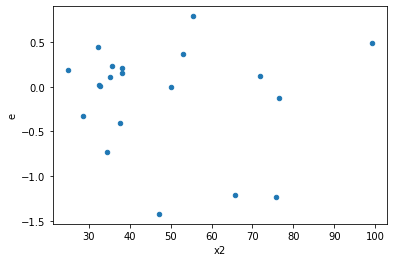

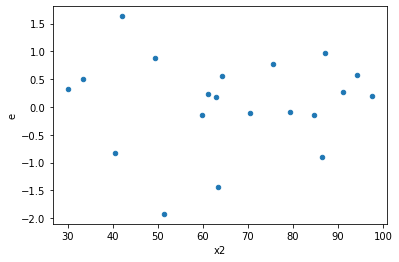

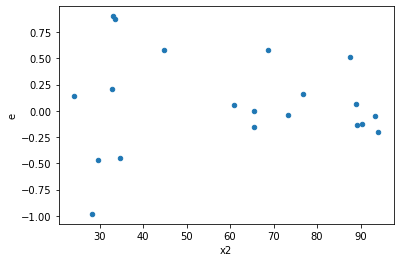

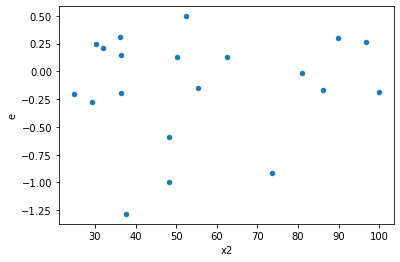

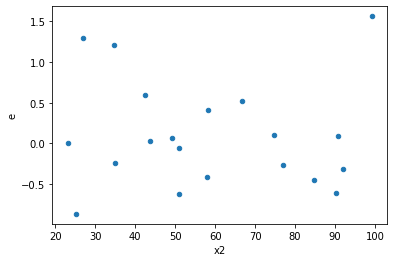

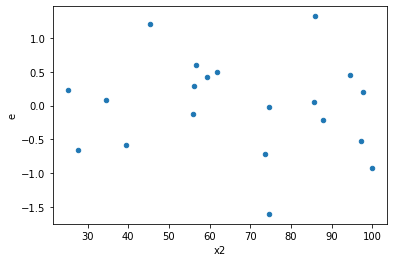

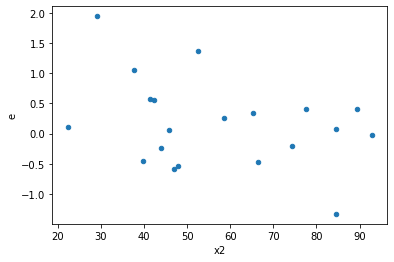

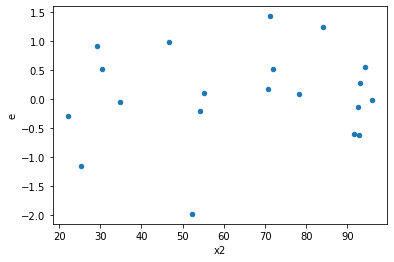

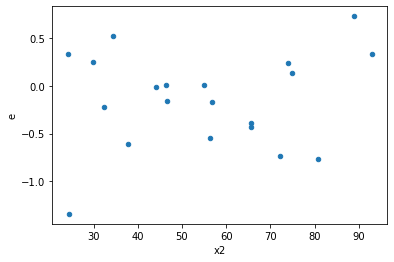

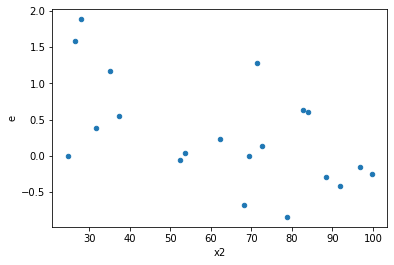

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
4.0,5.0,5.0,1.035853699093081,0.6591135417065179,0.2589634247732702,0.16477838542662948,1.571586128258177,0.6319144148038642,0.6840427925980679,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,3.342283909644028,0.5147961724296092,0.835570977411007,0.1286990431074023,6.492441258585768,0.060864335059007235,0.9695678324704964,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,3.0758078912678206,2.9313855449375423,0.7689519728169552,0.7328463862343856,1.0492676054092214,0.9591975616602726,0.5204012191698637,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,3.463718127826913,1.247286053471527,0.8659295319567283,0.3118215133678818,2.7770038141503055,0.2866687217706252,0.8566656391146874,Reject005=1 : Homoscedasticity
10.0,5.0,5.0,2.2529506996827373,0.6246380857921341,0.5632376749206843,0.15615952144803352,3.606809688566557,0.18546367925312235,0.9072681603734388,Reject005=1 : Homoscedasticity
15.0,5.0,5.0,2.3061188541883784,1.6678110623996423,0.5765297135470946,0.41695276559991057,1.3827218838987316,0.7308205018905258,0.6345897490547371,Reject005=1 : Homoscedasticity
18.0,5.0,5.0,1.1337137365876837,0.9623824472135051,0.2834284341469209,0.24059561180337627,1.1780282775005442,0.8616998757996019,0.569150062100199,Reject005=1 : Homoscedasticity
19.0,5.0,5.0,1.6528348948850116,1.4687341692114624,0.4132087237212529,0.3671835423028656,1.1253465259628226,0.9000516002674195,0.5499741998662903,Reject005=1 : Homoscedasticity
20.0,5.0,5.0,6.772602840921251,1.6198819896505845,1.6931507102303127,0.4049704974126461,4.180923600726082,0.1424751861986573,0.9287624069006714,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1.255931778349987,2.5224812731387036,0.31398294458749676,0.6306203182846759,0.4978953825045611,0.4623601245267363,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,2.4071800103305057,3.389140858601933,0.6017950025826264,0.8472852146504832,0.7102626036391715,0.7165081195928887,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,1.6989231278820138,2.4765902355469898,0.42473078197050346,0.6191475588867474,0.6859928233169273,0.6892762363917101,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,0.3091090045802104,2.289500792605813,0.0772772511450526,0.5723751981514532,0.13501152984026515,0.04642328816595256,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,1.035853699093081,0.6591135417065179,0.2589634247732702,0.16477838542662948,1.571586128258177,1.3680855851961358,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,3.342283909644028,0.5147961724296092,0.835570977411007,0.1286990431074023,6.492441258585768,0.060864335059007235,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,3.0758078912678206,2.9313855449375423,0.7689519728169552,0.7328463862343856,1.0492676054092214,1.0408024383397274,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.2871069119591991,4.42226552792756,0.07177672798979977,1.10556638198189,0.06492303778370093,0.009327304405774553,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,1.1578223316389704,3.8727511913709587,0.2894555829097426,0.9681877978427397,0.29896636123145826,0.2111764229150033,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      854
Reject005=0 : Heteroscedasticity    146
Name: Result_test, dtype: int64